In [1]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys

In [3]:
print(sys.prefix)

C:\Users\kumar\anaconda3


In [ ]:
# Feature Engineering

In [4]:
# import micri credit loan data files using pandas
df=pd.read_csv("F:/Pranjali/FLIP ROBO/Project/Micro_Credit_Loan.csv")

In [5]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,NaN,1539.0,...,6.0,NaN,2.0,12.0,6.0,NaN,29.000000,29.000000,UPW,7/20/2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,NaN,5787.0,...,12.0,NaN,1.0,12.0,12.0,NaN,NaN,NaN,UPW,8/10/2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,NaN,1539.0,...,6.0,NaN,1.0,6.0,6.0,NaN,NaN,NaN,UPW,8/19/2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,NaN,947.0,...,6.0,NaN,2.0,12.0,6.0,NaN,NaN,NaN,UPW,6/6/2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,NaN,2309.0,...,6.0,NaN,7.0,42.0,6.0,NaN,2.333333,2.333333,UPW,6/22/2016


In [6]:
# Check data types & null count as below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   205965 non-null  float64
 3   daily_decr30          202716 non-null  float64
 4   daily_decr90          202716 non-null  float64
 5   rental30              196374 non-null  float64
 6   rental90              196721 non-null  float64
 7   last_rech_date_ma     187535 non-null  float64
 8   last_rech_date_da     6718 non-null    float64
 9   last_rech_amt_ma      188598 non-null  float64
 10  cnt_ma_rech30         181614 non-null  float64
 11  fr_ma_rech30          130910 non-null  float64
 12  sumamnt_ma_rech30     181614 non-null  float64
 13  medianamnt_ma_rech30  181614 non-null  float64
 14  medianmarechprebal30  180126 non-null  float64
 15  

In [6]:
# Use ceil/floor method to round up numeric values.
import numpy as np

categorical_columns = [
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

for column in categorical_columns:
    df[column].apply(np.ceil)

In [7]:
# Use for loop to convert all data types (float) into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = [
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [8]:
# Use for loop to convert all data types(string) into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = [
'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  int64  
 3   daily_decr30          209593 non-null  int64  
 4   daily_decr90          209593 non-null  int64  
 5   rental30              209593 non-null  int64  
 6   rental90              209593 non-null  int64  
 7   last_rech_date_ma     209593 non-null  int64  
 8   last_rech_date_da     209593 non-null  int64  
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  int64  
 12  sumamnt_ma_rech30     209593 non-null  int64  
 13  medianamnt_ma_rech30  181614 non-null  float64
 14  medianmarechprebal30  209593 non-null  int64  
 15  

In [9]:
df.fillna(df.mean())

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,231,79417,75396,9455,10405,1,23722,13,...,0,94339,1,1,0,95810,849,1748,UPW,7/20/2016
1,1,76462I70374,671,120405,120609,82753,78606,19,135315,37,...,1,128034,0,1,1,129674,60926,54254,UPW,8/10/2016
2,1,17943I70372,494,64210,61690,34302,30126,2,135316,13,...,0,128035,0,0,0,129675,60925,54253,UPW,8/19/2016
3,1,55773I70781,200,13969,13918,6935,6689,40,135317,9,...,0,128036,1,1,0,129676,60924,54252,UPW,6/6/2016
4,1,03813I82730,906,46031,45901,40049,35352,3,135318,22,...,0,128037,6,6,0,129677,243,438,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,363,46132,46001,39743,35102,0,66596,30,...,0,60689,1,1,0,61942,0,0,UPW,6/17/2016
209589,1,95583I84455,1034,21981,21880,55110,49461,3,66597,5,...,0,60690,2,2,0,61943,0,0,UPW,6/12/2016
209590,1,28556I85350,972,119726,119932,99870,111929,2,66598,13,...,1,60691,5,8,1,61944,379,801,UPW,7/29/2016
209591,1,59712I82733,1691,121268,121918,17217,32387,1,37,5,...,1,158330,2,3,1,164805,78248,1299,UPW,7/25/2016


In [11]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,231,79417,75396,9455,10405,1,23722,13,...,0,94339,1,1,0,95810,849,1748,UPW,7/20/2016
1,1,76462I70374,671,120405,120609,82753,78606,19,135315,37,...,1,128034,0,1,1,129674,60926,54254,UPW,8/10/2016
2,1,17943I70372,494,64210,61690,34302,30126,2,135316,13,...,0,128035,0,0,0,129675,60925,54253,UPW,8/19/2016
3,1,55773I70781,200,13969,13918,6935,6689,40,135317,9,...,0,128036,1,1,0,129676,60924,54252,UPW,6/6/2016
4,1,03813I82730,906,46031,45901,40049,35352,3,135318,22,...,0,128037,6,6,0,129677,243,438,UPW,6/22/2016


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  int64  
 3   daily_decr30          209593 non-null  int64  
 4   daily_decr90          209593 non-null  int64  
 5   rental30              209593 non-null  int64  
 6   rental90              209593 non-null  int64  
 7   last_rech_date_ma     209593 non-null  int64  
 8   last_rech_date_da     209593 non-null  int64  
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  int64  
 12  sumamnt_ma_rech30     209593 non-null  int64  
 13  medianamnt_ma_rech30  181614 non-null  float64
 14  medianmarechprebal30  209593 non-null  int64  
 15  

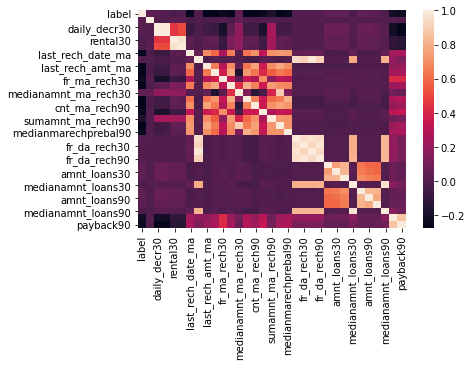

In [15]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

As per above heatmap,correlation exist in following columns-
daily_decr30               
rental30                   
last_rech_date_ma          
last_rech_date_da          
last_rech_amt_ma           
fr_ma_rech30               
medianamnt_ma_rech30  
medianmarechprebal30       
cnt_ma_rech90              
fr_ma_rech90               
sumamnt_ma_rech90          
medianamnt_ma_rech90       
medianmarechprebal90       
fr_da_rech30               
fr_da_rech90               
amnt_loans30              
medianamnt_loans30         
amnt_loans90              
medianamnt_loans90         
payback90

In [14]:
# Checking for skewness for each of the column as its not allowed more than 0.5
df.skew()

label                   -2.270254
aon                      3.061379
daily_decr30             0.070346
daily_decr90             0.217916
rental30                 0.394414
rental90                 0.399341
last_rech_date_ma        3.515946
last_rech_date_da        0.006674
last_rech_amt_ma         3.730708
cnt_ma_rech30            3.122546
fr_ma_rech30             1.337694
sumamnt_ma_rech30        2.203079
medianamnt_ma_rech30     3.644709
medianmarechprebal30     1.818703
cnt_ma_rech90            3.730242
fr_ma_rech90             1.631654
sumamnt_ma_rech90        1.676858
medianamnt_ma_rech90     3.682097
medianmarechprebal90     1.936262
cnt_da_rech30            0.002079
fr_da_rech30             0.000062
cnt_da_rech90            0.006123
fr_da_rech90             0.000160
cnt_loans30             10.214726
amnt_loans30            10.201898
maxamnt_loans30          8.914041
medianamnt_loans30       0.037174
cnt_loans90             10.465490
amnt_loans90            12.815685
maxamnt_loans9

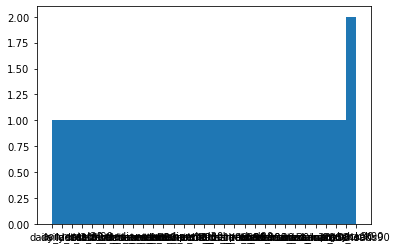

In [14]:
# load and summarize the dataset

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Load dataset
data=['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

# summarize the shape of the dataset
#print(data.shape)

# summarize each variable
#print(data.describe())

# histograms of the variables
pyplot.hist(data, bins=30)
pyplot.show()

In [10]:
# Apply standard scaler to reduce the skewness/non scaled data
import pandas as pd    
from sklearn.preprocessing import StandardScaler

features = ['aon','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30','payback90']
autoscaler = StandardScaler()
df[features] = autoscaler.fit_transform(df[features])

In [16]:
# Checking for skewness for each of the column as its not allowed more than 0.5
df.skew()

label                   -2.270254
aon                      3.061379
daily_decr30             0.070346
daily_decr90             0.217916
rental30                 0.394414
rental90                 0.399341
last_rech_date_ma        3.515946
last_rech_date_da        0.006674
last_rech_amt_ma         3.730708
cnt_ma_rech30            3.122546
fr_ma_rech30             1.337694
sumamnt_ma_rech30        2.203079
medianamnt_ma_rech30     3.644709
medianmarechprebal30     1.818703
cnt_ma_rech90            3.730242
fr_ma_rech90             1.631654
sumamnt_ma_rech90        1.676858
medianamnt_ma_rech90     3.682097
medianmarechprebal90     1.936262
cnt_da_rech30            0.002079
fr_da_rech30             0.000062
cnt_da_rech90            0.006123
fr_da_rech90             0.000160
cnt_loans30             10.214726
amnt_loans30            10.201898
maxamnt_loans30          8.914041
medianamnt_loans30       0.037174
cnt_loans90             10.465490
amnt_loans90            12.815685
maxamnt_loans9

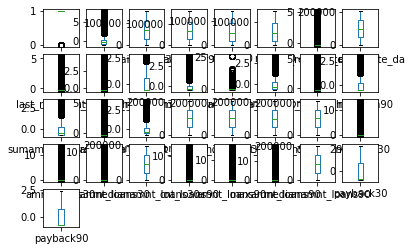

In [27]:
# Univariant Visualization - box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,8), sharex=False, sharey=False)
plt.show()

In [ ]:
# Multivariant Visualization-draw Scatter plot 
sns.pairplot(df)
plt.show()

In [ ]:
# Prepare X & Y to train/test model

In [11]:
import pandas as pd
X = df[[
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pdate']]
y = df.label        # y is a vector, hence we use dot to access 'label'

have removed non impacted column like msisdn,pcirle                

In [12]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(209593, 32)


In [13]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(209593,)


In [ ]:
ROC Curve - Predictive model

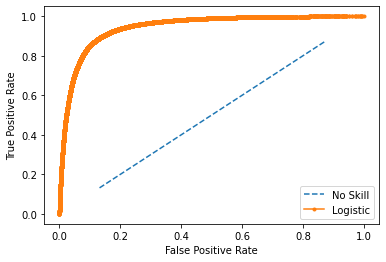

In [21]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=209593, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill roc curve
pyplot.plot([0.87, 0.13], [0.87, 0.13], linestyle='--', label='No Skill')

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)

# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [14]:
# example of a roc auc for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=209593, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate roc auc for
roc_auc = roc_auc_score(testy, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)

print('Logistic ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.497
Logistic ROC AUC 0.943


ROC AUC for the Logistic Regression model on this dataset is about 0.934, which is much better than a no skill classifier that would achieve the score in this case of 0.497

In [ ]:
Precision-Recall Curve - Predictive model

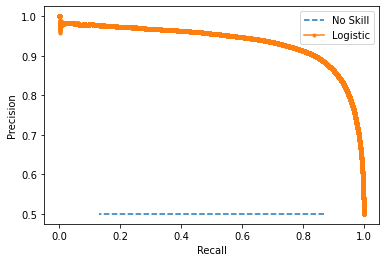

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=209593, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# plot the no skill precision-recall curve
pyplot.plot([0.87, 0.13], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)

# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [21]:
# example of a precision-recall auc for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# generate 2 class dataset
X, y = make_classification(n_samples=209593, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)

print('Logistic PR AUC: %.3f' % auc_score)

No Skill PR AUC: 0.626
Logistic PR AUC: 0.934


Precision-Recall AUC for the Logistic Regression model on this dataset is about 0.934, which is much better than a no skill classifier that would achieve the score in this case of 0.625

In [15]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression()

In [17]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.8804366495543808


In [18]:
# Load libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto','brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

In [ ]:
# extract best estimator
print(grid_kn.best_estimator_)

Output:
KNeighborsClassifier(algorithm='auto', 
leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=25, p=2, weights='distance')

# to test the bestfit
print(grid_kn.score(X_test, y_test))

In [21]:
# Grid Search for hyper-tuning parameters 

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
0.5504294684501932
1.0


In [31]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ADE10A8820>})
0.5504294684376422
0.9865711107322401


In [32]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=5, scoring='roc_auc').mean()

0.9435972131456125

In [ ]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.878819 (0.001894)


In [ ]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=10,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=10)


print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

In [ ]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score = joblib_knn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for KNN Model: {0:.2f} %".format(100 * score))

In [ ]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

This model giving best score for logistic & KNN both as 87% which is good.